# Network Analysis Exercise 3

Exercises for the Network Analysis course

Each cell should be aiming at solving one of the exercise tasks.

In [ ]:
#| default_exp networks03

In [ ]:
#| hide
from nbdev.showdoc import *

## 1) Power-law behaviour
(2 points) The tables show function values for functions $f(x)$ and $g(x)$ on different
values of $x$. Plot the function values in a way that allows you to determine if any of the
functions exhibits power-law behavior. If yes, determine the exponent.

| $x$    | $f(x)$    |
| ------ | --------- |
| 5.00   | 252822.43 |
| 7.50   | 84599.77  |
| 11.25  | 28308.89  |
| 16.88  | 9472.76   |
| 25.31  | 3169.79   |
| 37.97  | 1060.68   |
| 56.95  | 354.93    |
| 85.43  | 118.77    |
| 128.14 | 39.74     |
| 192.22 | 13.30     |


| $x$    | $g(x)$     |
| ------ | ---------- |
| 3.00   | 5824779.30 |
| 5.10   | 1185913.90 |
| 8.67   | 347172.77  |
| 14.74  | 114200.30  |
| 25.06  | 40746.59   |
| 42.60  | 17235.83   |
| 72.41  | 69248.85   |
| 123.10 | 384.66     |
| 209.27 | 10.41      |
| 355.76 | 0.13       |




### Solution
To provide a solution to the exercise:
Provide your plot, report your judgment on power-law behavior and in case the
exponent.

In [ ]:
#|hide
# Imports
import matplotlib.pyplot as plt  
import numpy as np  
from scipy import stats

In [ ]:
#|code-fold: true
x1 = np.array([5.00, 7.50, 11.25, 16.88, 25.31, 37.97, 56.95, 85.43, 128.14, 192.22])  
y1 = np.array([252822.43, 84599.77, 28308.89, 9472.76, 3169.79, 1060.68, 354.93, 118.77, 39.74, 13.30])  

x2 = np.array([3.00, 5.10, 8.67, 14.74, 25.06, 42.60, 72.41, 123.10, 209.27, 355.76])  
y2 = np.array([5824779.30, 1185913.90, 347172.77, 114200.30, 40746.59, 17235.83, 69248.85, 384.66, 10.41, 0.13])

Data plotted for $f(x)$ and $g(x)$:

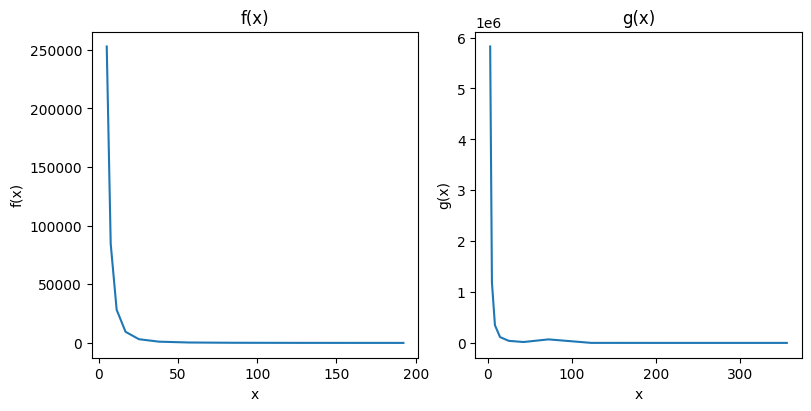

In [ ]:
#|code-fold: true
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', figsize = (8, 8/2))  
# log-log plot of f(x)
ax1.set_xlabel("x")
ax1.set_ylabel("f(x)")  
ax1.set_title("f(x)")
ax1.plot(x1, y1)  
# log-log plot of g(x)
ax2.set_xlabel("x")  
ax2.set_ylabel("g(x)")  
ax2.set_title("g(x)")
ax2.plot(x2, y2)  
plt.show()

Power law is defined with $P_k = Ck^\alpha$.



Values for alpha are often in the range 2-3 and taking the log of function and argument leads to a linear relation, visible as a diagonal straight line in a log-log plot.

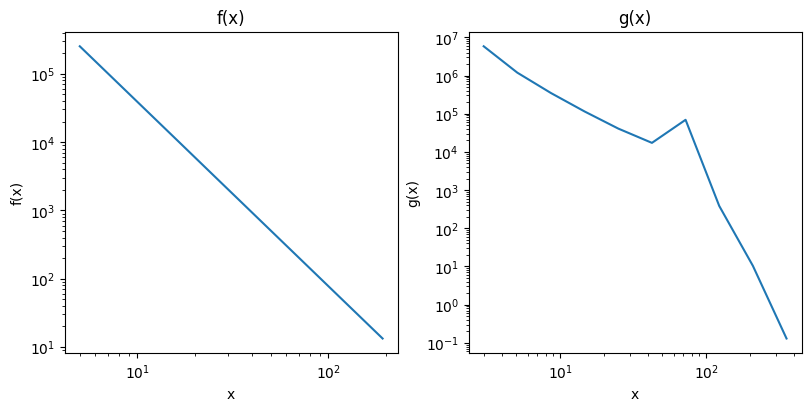

In [ ]:
#|code-fold: true
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', figsize = (8, 8/2))  
# log-log plot of f(x)
ax1.set_xlabel("x")
ax1.set_xscale('log')
ax1.set_ylabel("f(x)")  
ax1.set_yscale('log')
ax1.set_title("f(x)")
ax1.plot(x1, y1)  
# log-log plot of g(x)
ax2.set_xlabel("x")  
ax2.set_xscale('log')
ax2.set_ylabel("g(x)")  
ax2.set_yscale('log') 
ax2.set_title("g(x)")
ax2.plot(x2, y2)  
plt.show()

* In a diagram with logarithmic axes showing the fraction of nodes (y) with a certain degree (x), i.e. showing the degree distribution - logarithm of $P_k$ is a linear function of the logarithm of $k$.

This can be seen here where we have a straight line for $f(x)$ but not for $g(x)$ which suggests that we only have a power-law for $f(x)$. But the lecture notes, that looking at the diagram alone might be deceiving. In particular, if the data is incomplete. True power law should be monotonically decreasing, node degree might deviate for small k.

We can make sure we have a power-law we can apply a logarithmic transformation to the data and do a linear regression to estimate the exponent.

$$\ln(P_k) = -\alpha \ln(k+c)$$
$$\log(f(x)) = -\alpha \cdot \log(x) + \log(C)$$


* What does do the plots tell me about the data.


In summary we can tell that...
Mit nur dem Wissen was ich aktuell dazu im Kopf habe, komme ich hier an dieser stelle nicht mehr weiter. 
This is also explained in ...
Kapitel 10.4 erklärt eine Methode zur darstellung von scale free und power law Dynamiken, indem man einen graph zeichnet bei dem beide axen logarithmisch sind. Dann kann man die werte linear fitten und bekommt so den exponenten nach dem dieser graph wächst. Und je nachdem wie gut sich die daten an diesen optimalen wert anpassen umso mehr deutet das darauf hin dass es sich dabei um ein power law Wachstum handelt.

In [ ]:
#|export
def plot_linregress_comparison(x, y, name, ax):
    log_x = np.log10(x)
    log_y = np.log10(y)
    res = stats.linregress(log_x, log_y)
    alpha = -res.slope
    
    
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.plot(x, y, 'o', label='Original data')
    ax.plot(x, 10**(res.slope * log_x + res.intercept), '--', label=f'Fit: y ~ x^-{alpha:.2f}')
    ax.set_xlabel('x')
    ax.set_ylabel(name)
    ax.set_title(f'Log-log plot of {name}')
    ax.legend()
    ax.grid(True)
    # Print results
    print(f"Estimated power-law exponent {name}: α ≈ {alpha:.2f}")
    print(f"R-squared {name}: {res.rvalue**2:.6f}")

Estimated power-law exponent f(x): α ≈ 2.70
R-squared f(x): 1.000000
Estimated power-law exponent g(x): α ≈ 3.16
R-squared g(x): 0.850754


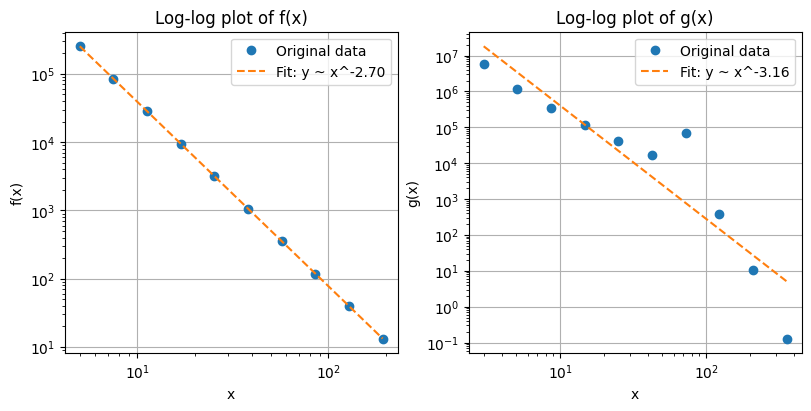

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, layout='constrained', figsize = (8, 8/2))  
plot_linregress_comparison(x1, y1, "f(x)", ax1)
plot_linregress_comparison(x2, y2, "g(x)", ax2)
plt.show()

The results show that for `f(x)` we clearly have a power-law with the exponent $\alpha = 2.70$

Now what do we see here? What does that tell us about the graph?

We see that `f(x)` creates a straight line, suggesting that it exactly follows the power law growth for bigger x.
In contrast we dont see the same behaviour for `g(x)`

We now want to calculate the exponent for f(x), where we think we have a power law.

## 2) Categorizing Networks 
(2 points) In the lecture we discussed a simple way to quantify assortativity and to
assign a network into one of the three categories by fitting a power function to the
degree correlation $\bar k_{nn}(k)$.
Try this approach for the networks `As3G1.txt` and `As3G2.txt` in Ilias and report your
results. Note this correlation is implemented (e.g. in networkx as
average_degree_connectivity)
A more formally sound version is to simply use the Pearson correlation coefficient $r$ of
the degrees at either ends of the graph’s edges. As it is normalized, it lies between $-1≤r≤1$ and can be interpreted the same way as our correlation exponent.
$$r = \frac{1}{\sigma^2_q}\sum_{jk}jk(e_{jk}-q_jq_k)$$
with $\sigma_q^2$ being the variance of excess degree distribution $q(k)$. Luckily, this measure is
also already implemented in many analysis tools (e.g. networkx as
degree_pearson_correlation_coefficient). Apply the method on the network, report
your result and compare to the finding for the first method. Then run a number (e.g. 10) of degree sequence preserving randomization and report if/which changes occur to the second measure.

### Solution
To provide a solution to the exercise:
Provide the diagram for the fitting, and your correlation exponent, the result for
pearson correlation for the original and randomised networks.

* I dont even know what kind of data these txt graphs are, so of the information i know i wouldnt even know how to load them. 
	The first i think is an edge  list, where two nodes comprise an edge.
	The second one is an edge list with weights.
	

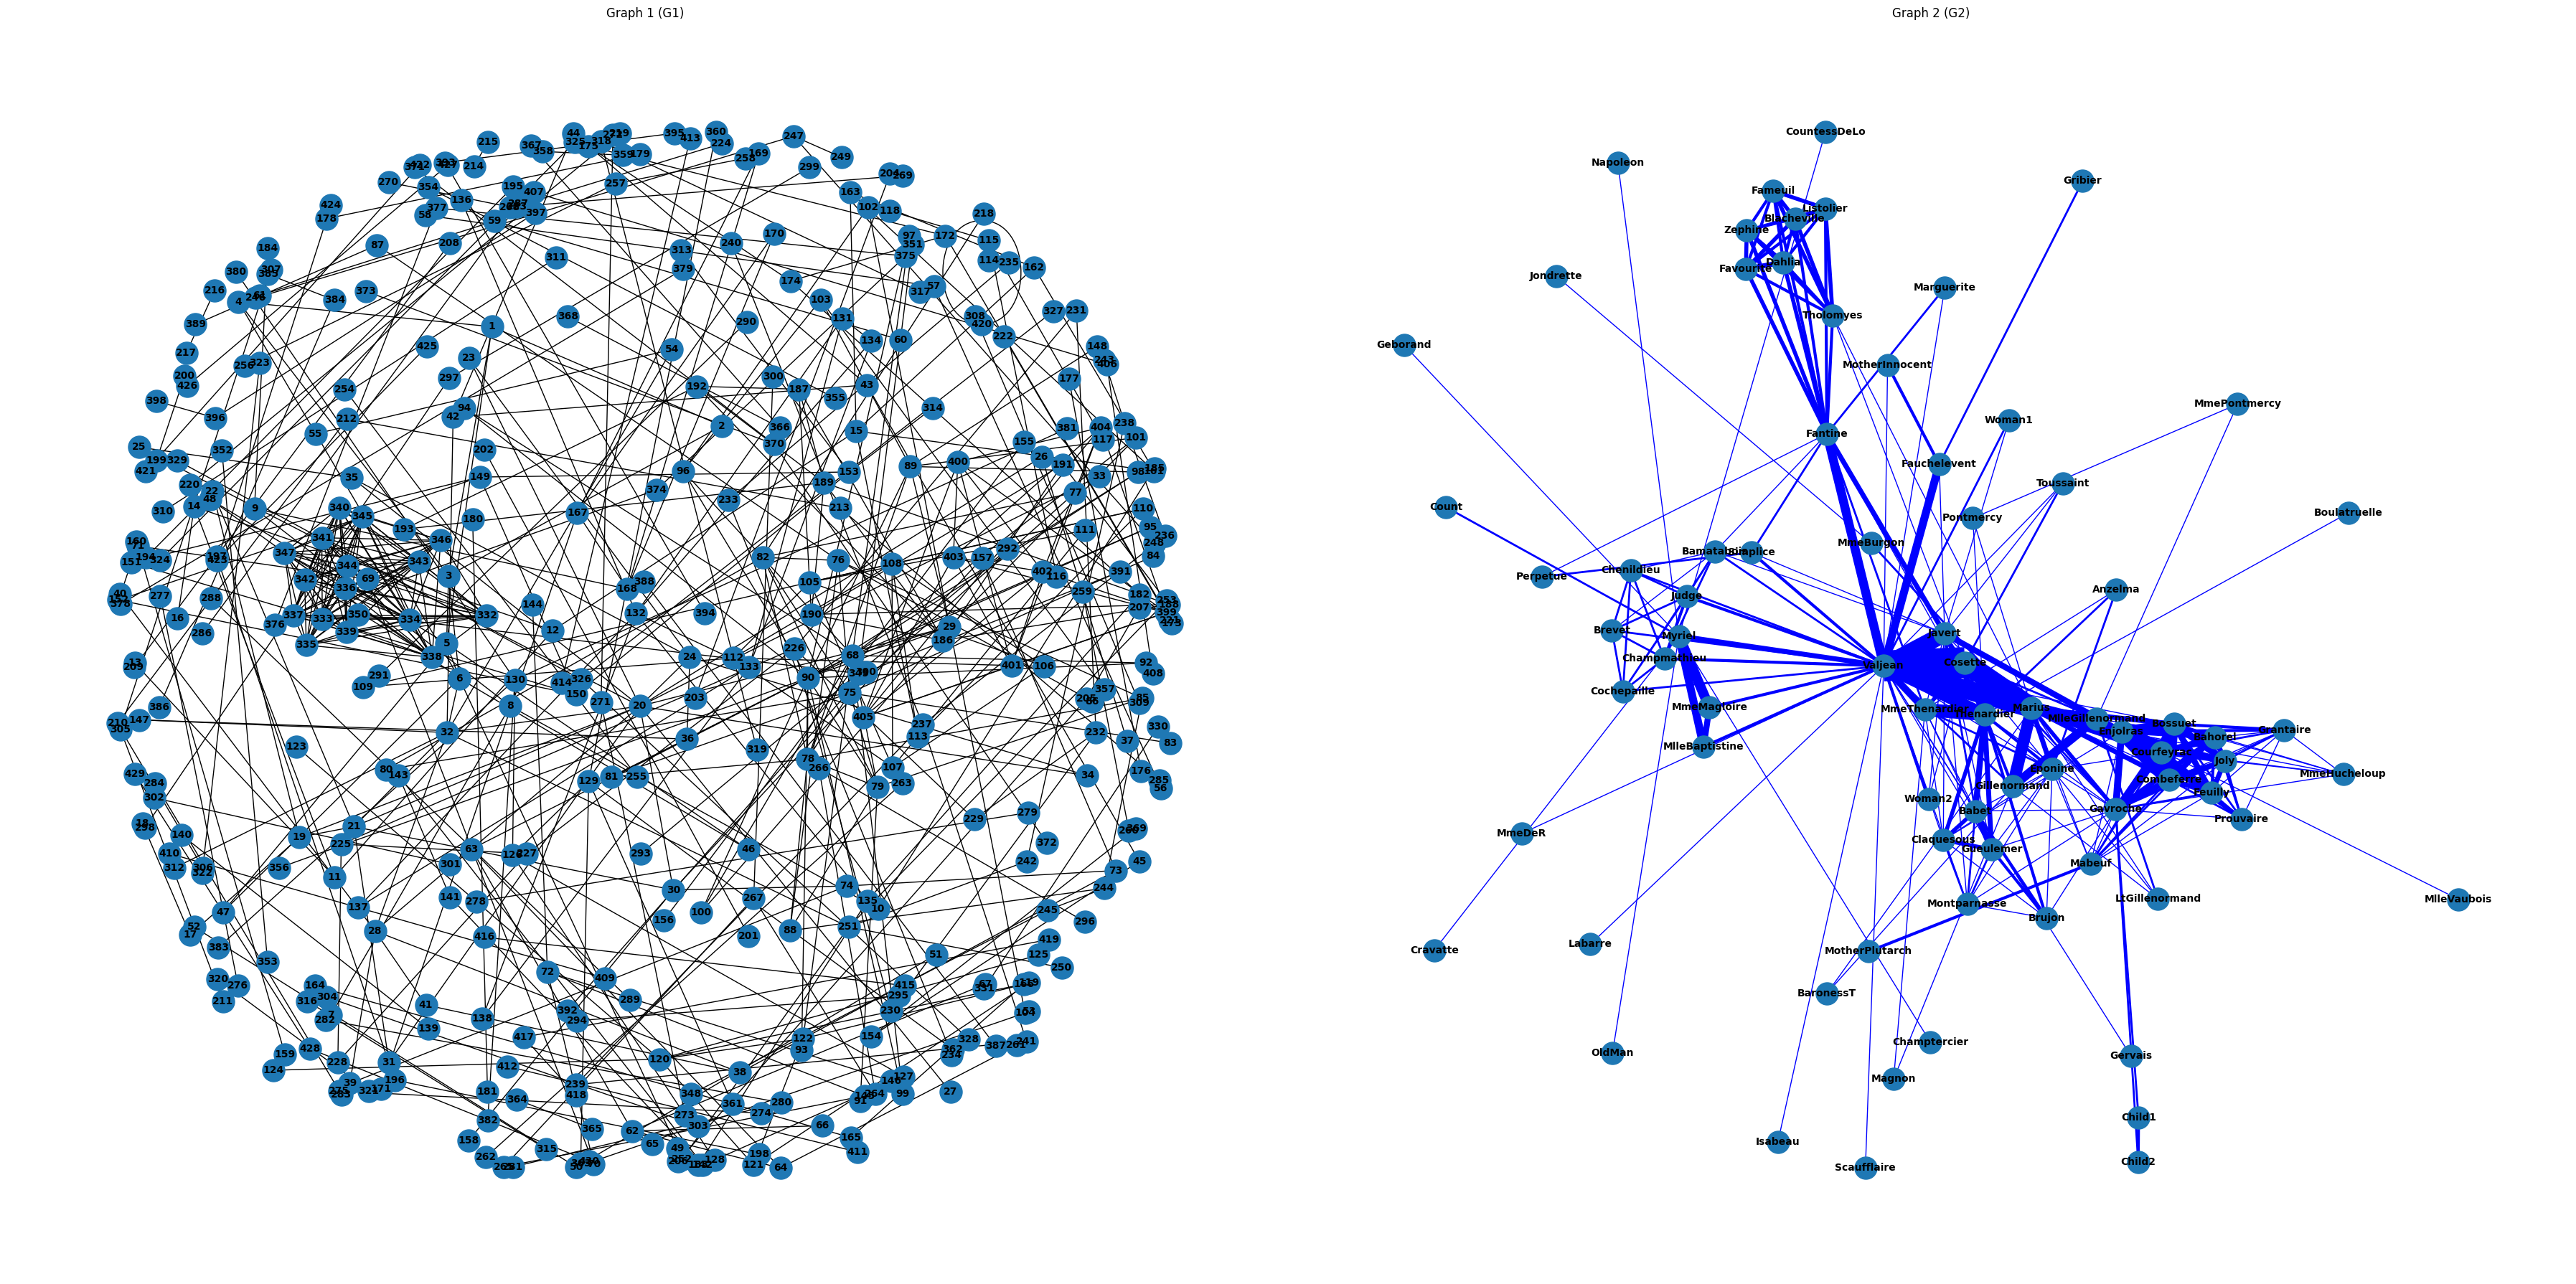

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import ast

G1 = nx.read_adjlist("../data/As3G1.txt", nodetype=int)
G2 = nx.Graph()
with open("../data/As3G2.txt") as f:
    for line in f:
        a, b, attr = line.strip().split(maxsplit=2)
        G2.add_edge(a, b, **ast.literal_eval(attr))

# Compute stats
avgDeg_G1 = nx.average_degree_connectivity(G1)
pearsCorrel_G1 = nx.degree_pearson_correlation_coefficient(G1)
avgDeg_G2 = nx.average_degree_connectivity(G2)
pearsCorrel_G2 = nx.degree_pearson_correlation_coefficient(G2)

# Create larger figure
plt.figure(figsize = (36, 18))

# Draw Graph 1
subax1 = plt.subplot(121)
pos1 = nx.spring_layout(G1, seed=42, k=0.5)
nx.draw(
    G1, pos1, with_labels=True,
    node_size=500, font_size=10,
    font_weight='bold'
)
plt.title("Graph 1 (G1)")

# Draw Graph 2
subax2 = plt.subplot(122)
pos2 = nx.spring_layout(G2, seed=42, k=0.5)
edge_weights = [d['weight'] for (_, _, d) in G2.edges(data=True)]

nx.draw(G2, pos2, with_labels=True, node_size=500, font_size=10, width=edge_weights, font_weight='bold', edge_color="blue")
plt.title("Graph 2 (G2)")

plt.tight_layout()
plt.show()

## 3) Finding a graph with certain properties
(2 points) We discussed in the lecture that there are differing definitions for average
($C_G$) and global clustering coefficient ($C_{GG}$).
* a) Given the double star graph family from Assignment 2.2, where we showed that
both values diverge ($C_G \rightarrow 1$, $C_{GG} \rightarrow 0$) for increasing $k$ (periphery nodes): Can you
find a graph family for which they approach the opposite values or at least go in
the opposite direction compared to double star? In case, describe it and give the
general formula for its clustering coefficients.
* b) What is the smallest graph you can find for which the two values differ?

### Solution
To provide a solution to the exercise:
Provide the description, formula, and graph.

* Ich hab keine ahnung wie ich das angehen sollte ausser das an Gpt zu senden. 
* Ich muss mir erstmal die eigenschaften von dem Graph aus 2.2 ansehen und dann überlegen was passieren müsste um das umzudrehen.

 

## 4)  Giant component
(2 points) In the last lecture we discussed the growth of the giant component during
the creation of a graph by the random model. Run an experiment with increasing
values of the edge probability and report the development of the giant component
size (relative to the number of nodes in the graph) in relation to the probability values.
### Solution
To provide a solution to the exercise:
Provide a diagram that shows the development of the size over the range of
probability values.

just create a random model graph in python

scale the number of nodes and calculate the metric for each level. 

Then plot the accumulated results.

## 5) Rich Club
(2 points) Select two networks from different categories of the SNAP Large Network
Collection (https://snap.stanford.edu/data/index.html). Calculate the simple version of
the rich club coefficient ($\phi(k)$ ) for each network and report it in a diagram as shown in
the lecture. Then calculate the improved version $\rho_{ran}(k)$ and report the result.

### Solution
To provide a solution to the exercise:
Shortly describe the networks, provide the diagrams and your verdict on rich club
phenomenon.

What is the formula for $\phi (k)$ and $\rho_{ran} (k)$.

Use each formula to implement an algorithm solving this calculation and apply it to the graph. 
Alternately use a predefined algorithm if it is available and just 

Email-EuAll Network:

* Just write down the information from the network site.
* Create a diagram as in the lecture (what kind of diagram did we see in the lecture?)
* Is a rich club phenomenon present here?
Wiki-Vote Network:

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import ast

In [ ]:
G1 = nx.read_adjlist("../data/Email-EuAll.txt", nodetype=int, create_using=nx.DiGraph())

## Misc

In [ ]:
#|hide
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
K_5 = nx.complete_graph(5)
K_3_5 = nx.complete_bipartite_graph(3, 5)
barbell = nx.barbell_graph(10, 10)
lollipop = nx.lollipop_graph(10, 20)

er = nx.erdos_renyi_graph(100, 0.15)
ws = nx.watts_strogatz_graph(30, 3, 0.1)
ba = nx.barabasi_albert_graph(100, 5)
red = nx.random_lobster(100, 0.9, 0.9)

In [ ]:
#|hide
G = nx.karate_club_graph()
pr = nx.pagerank(G)  # runs using backend from NETWORKX_BACKEND_PRIORITY, if set


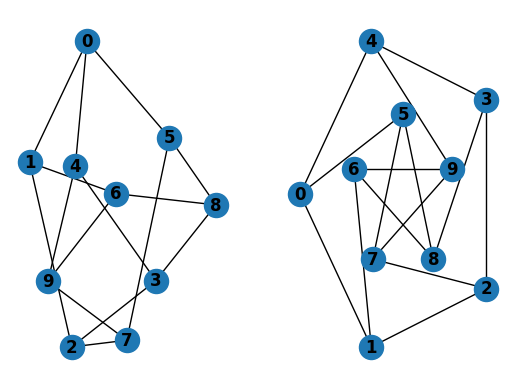

In [ ]:
#|hide
G = nx.petersen_graph()
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
subax2 = plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

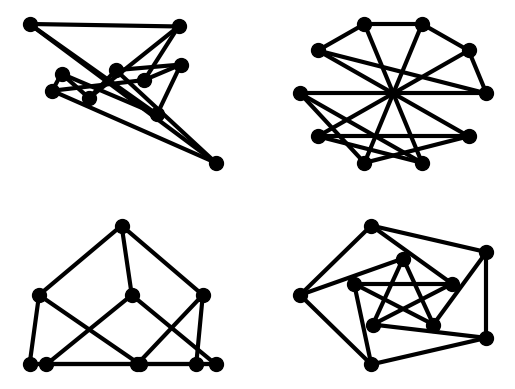

In [ ]:
#|hide
options = {
    'node_color': 'black',
    'node_size': 100,
    'width': 3,
}
subax1 = plt.subplot(221)
nx.draw_random(G, **options)
subax2 = plt.subplot(222)
nx.draw_circular(G, **options)
subax3 = plt.subplot(223)
nx.draw_spectral(G, **options)
subax4 = plt.subplot(224)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], **options)

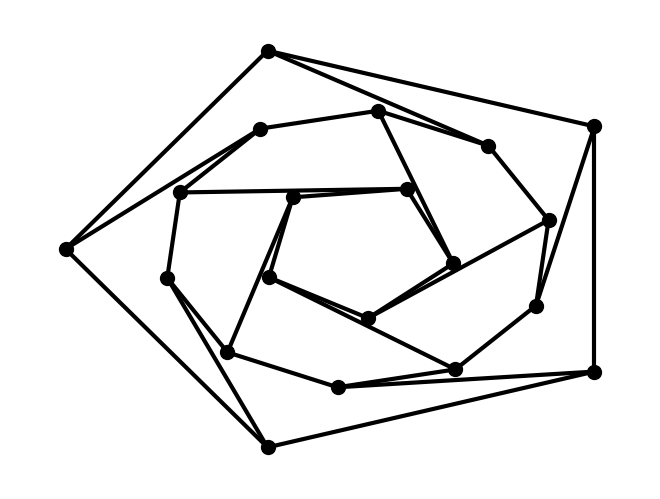

In [ ]:
#|hide
G = nx.dodecahedral_graph()
shells = [[2, 3, 4, 5, 6], [8, 1, 0, 19, 18, 17, 16, 15, 14, 7], [9, 10, 11, 12, 13]]
nx.draw_shell(G, nlist=shells, **options)

Centrality Metrics


In [ ]:
#|hide
import networkx as nx
import matplotlib.pyplot as plt

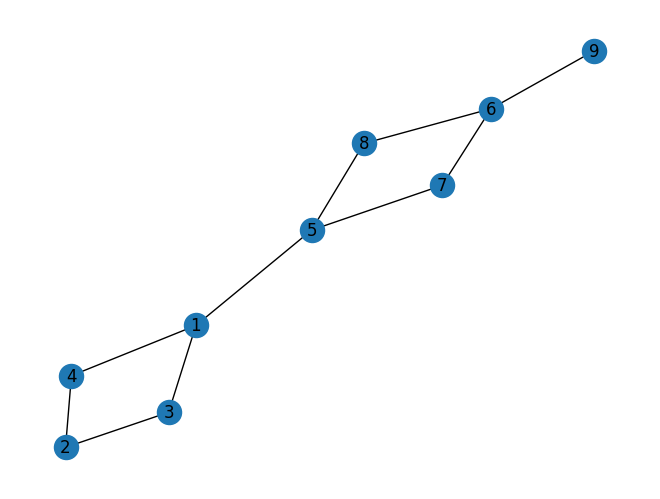

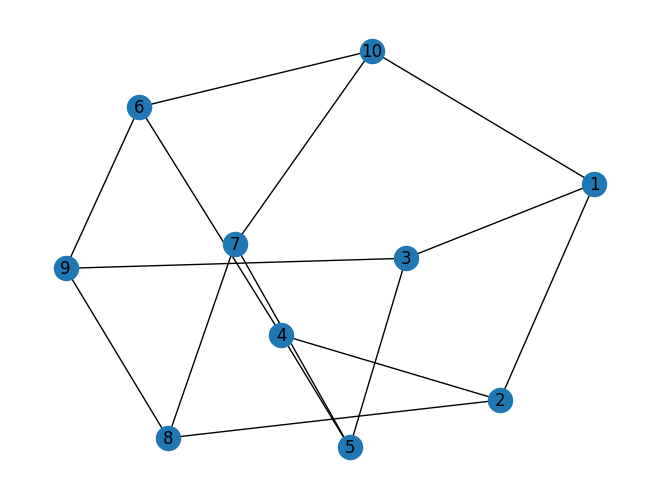

Closeness Centrality
{1: 0.5, 2: 0.3076923076923077, 3: 0.38095238095238093, 4: 0.38095238095238093, 5: 0.5333333333333333, 6: 0.38095238095238093, 7: 0.4444444444444444, 8: 0.4444444444444444, 9: 0.2857142857142857}
{1: 0.6, 2: 0.6, 3: 0.6, 4: 0.6, 5: 0.6, 6: 0.6, 7: 0.6, 8: 0.6, 9: 0.6, 10: 0.6}
{1: 0.0625, 2: 0.038461538461538464, 3: 0.047619047619047616, 4: 0.047619047619047616, 5: 0.06666666666666667, 6: 0.047619047619047616, 7: 0.05555555555555555, 8: 0.05555555555555555, 9: 0.03571428571428571}
{1: 0.06666666666666667, 2: 0.06666666666666667, 3: 0.06666666666666667, 4: 0.06666666666666667, 5: 0.06666666666666667, 6: 0.06666666666666667, 7: 0.06666666666666667, 8: 0.06666666666666667, 9: 0.06666666666666667, 10: 0.06666666666666667}
Betweenness Centrality:
{1: 15.5, 2: 0.5, 3: 3.0, 4: 3.0, 5: 16.5, 6: 7.5, 7: 5.0, 8: 5.0, 9: 0.0}
{1: 3.0, 2: 3.0, 3: 3.0, 4: 3.0, 5: 3.0, 6: 3.0, 7: 3.0, 8: 3.0, 9: 3.0, 10: 3.0}
Degree Centrality for Graph
0.125
0.0


In [ ]:
# Define Graph A
A = nx.Graph()
A.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9])
A.add_edges_from([(1, 5), (1, 3), (1, 4), (2, 3), (2, 4), (5, 7), (5, 8), (6, 7), (6, 8), (6, 9)])

pos = nx.spring_layout(A, seed=1)  # Seed layout for reproducibility
nx.draw(A, pos=pos, with_labels=True)
plt.show()

# Define Graph B
B = nx.Graph()
B.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
B.add_edges_from(
    [(1, 10), (1, 2), (1, 3), (2, 8), (2, 4), (3, 9), (3, 5), (4, 6), (4, 5), (5, 7), (6, 10), (6, 9), (7, 10), (7, 8),
     (8, 9)])

nx.draw(B, with_labels=True)
plt.show()

print("Closeness Centrality")
C_closA = nx.closeness_centrality(A)
print(C_closA)
C_closB = nx.closeness_centrality(B)
print(C_closB)


def closeness_centrality(G):
    # Closeness raw (1 / sum distances)
    # compute shortest path lengths
    closeness_raw = {}
    for v in G.nodes():
        lengths = nx.single_source_shortest_path_length(G, v)
        sum_dist = sum(lengths[u] for u in G.nodes() if u != v)
        closeness_raw[v] = 1 / sum_dist if sum_dist > 0 else 0
    return closeness_raw


print(closeness_centrality(A))
print(closeness_centrality(B))

print("Betweenness Centrality:")
C_betA = nx.betweenness_centrality(A, normalized=False)
print(C_betA)
C_betB = nx.betweenness_centrality(B, normalized=False)
print(C_betB)

print("Degree Centrality for Graph")


def freeman_degree_centralization(G):
    n = A.number_of_nodes()
    degrees = dict(G.degree())
    max_degree = max(degrees.values())
    sum_diff = sum(max_degree - d for d in degrees.values())
    C_deg = sum_diff / ((n - 1) * (n - 2))
    return C_deg


C_degA = freeman_degree_centralization(A)
print(C_degA)
C_degB = freeman_degree_centralization(B)
print(C_degB)

In [ ]:
#| hide
import nbdev; nbdev.nbdev_export()

In [ ]:
import pandas as pd

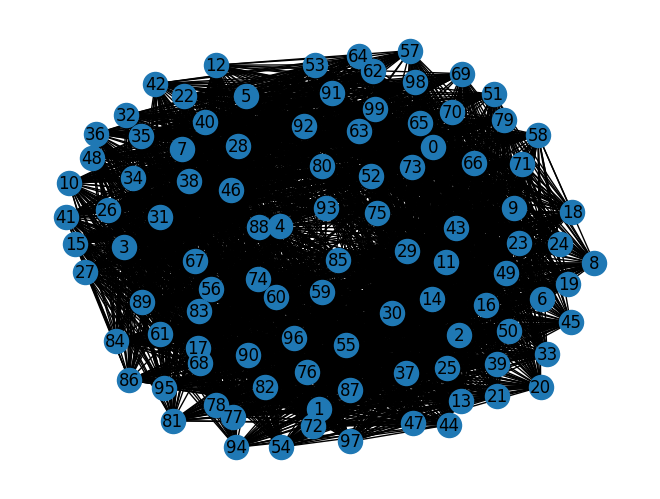

Farness of node 0: 148
Closeness of node 0: 0.006757


In [ ]:
G = nx.Graph()
G.add_nodes_from(range(100))
central = 0
neighbors = list(range(1, 51))
others = list(range(51, 100))

edges = [(central, v) for v in neighbors] + [(u, v) for u in neighbors for v in others]
G.add_edges_from(edges)
lengths = nx.single_source_shortest_path_length(G, central)
distances = [dist for node, dist in lengths.items() if node != central]

dist_counts = pd.Series(distances).value_counts().sort_index()
df = pd.DataFrame({
    'distance': dist_counts.index,
    'count': dist_counts.values
})

# Compute farness and closeness
farness = sum(distances)
closeness = 1 / farness

nx.draw(G, with_labels=True)
plt.show()
print(f'Farness of node 0: {farness}')
print(f'Closeness of node 0: {closeness:.6f}')